# Spatial Overlays
notebook being referenced: https://github.com/geopandas/geopandas/blob/master/examples/overlays.ipynb

In [15]:
from IPython.core.display import Image
Image(url="http://docs.qgis.org/testing/en/_images/overlay_operations.png")

Spatial overlays allow you to compare two GeoDataFrames containing polygon or multipolygon geometries and create a new GeoDataFrame with the new geometries representing the spatial combination and merged properties.

Overlays operate at the dataframe level, not on individual geometries, and the properties from both are retained

In [4]:
%matplotlib inline
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay

In [1]:
# NYC boroughs
zippath = datasets.get_path('nybb')
polydf = read_file(zippath)

# Generates circles
b = [int(x) for x in polydf.total_bounds]
N = 10
polydf2 = GeoDataFrame([
    {'geometry': Point(x, y).buffer(10000), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(b[0], b[2], int((b[2] - b[0]) / N)),
                    range(b[1], b[3], int((b[3] - b[1]) / N)))])

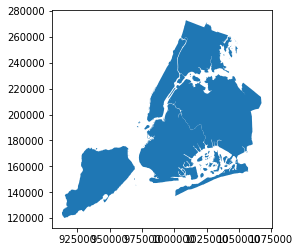

In [3]:
polydf.plot()

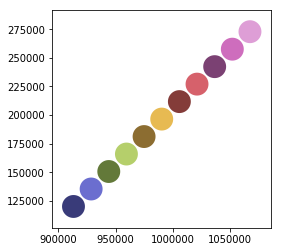

In [6]:
polydf2.plot(cmap='tab20b')

## Intersection

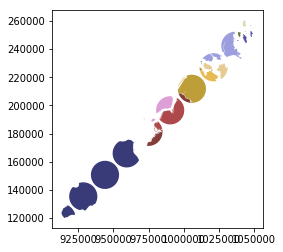

In [7]:
from geopandas.tools import overlay
newdf = overlay(polydf, polydf2, how="intersection")
newdf.plot(cmap='tab20b')

In [8]:
polydf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...


In [9]:
polydf2.head()

,geometry,value1,value2
0,"POLYGON ((923175 120121, 923126.847266722 1191...",1033296,793054
1,"POLYGON ((938595 135393, 938546.847266722 1344...",1063988,793202
2,"POLYGON ((954015 150665, 953966.847266722 1496...",1094680,793350
3,"POLYGON ((969435 165937, 969386.847266722 1649...",1125372,793498
4,"POLYGON ((984855 181209, 984806.847266722 1802...",1156064,793646


In [10]:
newdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,value1,value2,geometry
0,5,Staten Island,330470.010332,1.623820e+09,1033296,793054,"POLYGON ((916755.4256330276 129447.9617643995,..."
1,5,Staten Island,330470.010332,1.623820e+09,1063988,793202,"POLYGON ((938595 135393, 938546.847266722 1344..."
2,5,Staten Island,330470.010332,1.623820e+09,1125372,793498,"POLYGON ((961436.3049926758 175473.0296020508,..."
3,5,Staten Island,330470.010332,1.623820e+09,1094680,793350,"POLYGON ((954015 150665, 953966.847266722 1496..."
4,2,Bronx,464392.991824,1.186925e+09,1309524,794386,"POLYGON ((1043287.193237305 260300.0289916992,..."


## Side-by-side

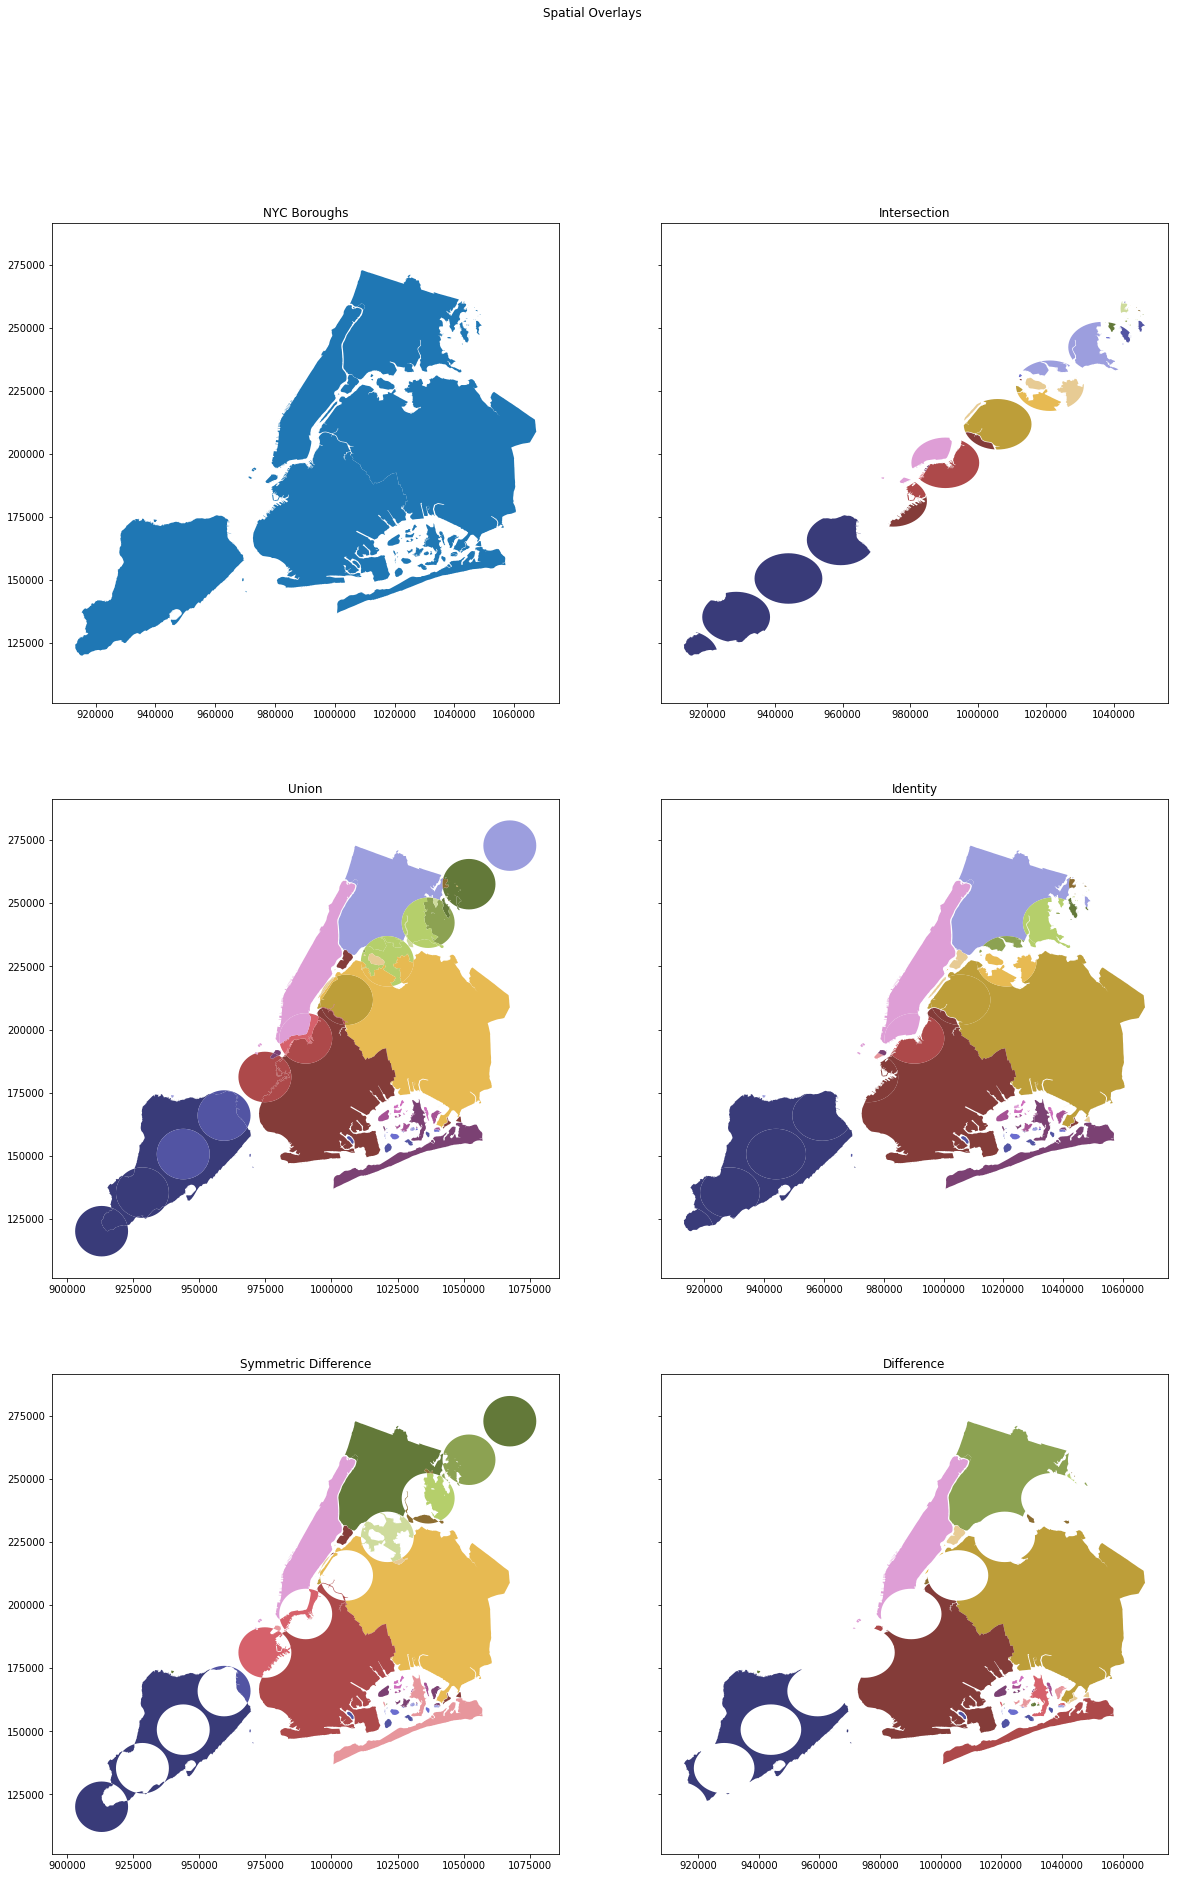

In [28]:
import matplotlib.pyplot as plt

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 30), sharey=True)
f.suptitle('Spatial Overlays')

ax1 = polydf.plot(ax=ax1)
ax1.set_title("NYC Boroughs")

intersection = overlay(polydf, polydf2, how="intersection")
ax2 =  intersection.plot(ax = ax2, cmap='tab20b')
ax2.set_title("Intersection")

union = overlay(polydf, polydf2, how="union")
ax3 =  union.plot(ax = ax3, cmap='tab20b')
ax3.set_title("Union")

identity = overlay(polydf, polydf2, how="identity")
ax4 =  identity.plot(ax = ax4, cmap='tab20b')
ax4.set_title("Identity")

symmetric_difference = overlay(polydf, polydf2, how="symmetric_difference")
ax5 =  symmetric_difference.plot(ax = ax5, cmap='tab20b')
ax5.set_title("Symmetric Difference")

difference = overlay(polydf, polydf2, how="difference")
ax6 =  difference.plot(ax = ax6, cmap='tab20b')
ax6.set_title("Difference")

plt.show()

## Explanation

**Intersection** - Only the sections that are in both dataframes.

**Union** - All of both dataframes.

**Identity** - The surface of df1, but with the geometries obtained from overlaying df1 with df2.

**Symmetric Difference** - Union without the intersecting parts.

**Difference** - Sections that are only in one dataframe (doesn't matter which dataframe).